<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

In [28]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import cluster
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, v_measure_score

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Fit DBSCAN on a generated dataset


We will start with a simple generated dataset. 

Import the `make_circles` function from `sklearn.datasets`. You can use this to generate some clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

### 1. Plot the generated circles data

In [29]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
# set X
circles = pd.DataFrame(circles_X)
circles ['y'] = circles_y
X = circles.drop('y', axis = 1)

# disply X
X.head()


,0,1
0,-0.087696,1.085978
1,-0.837558,0.547310
2,0.796843,0.411495
3,0.212158,0.106985
4,-0.053684,0.979634


In [30]:
X.shape


(1000, 2)

In [31]:
# disply y
y = circles_y
y

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,

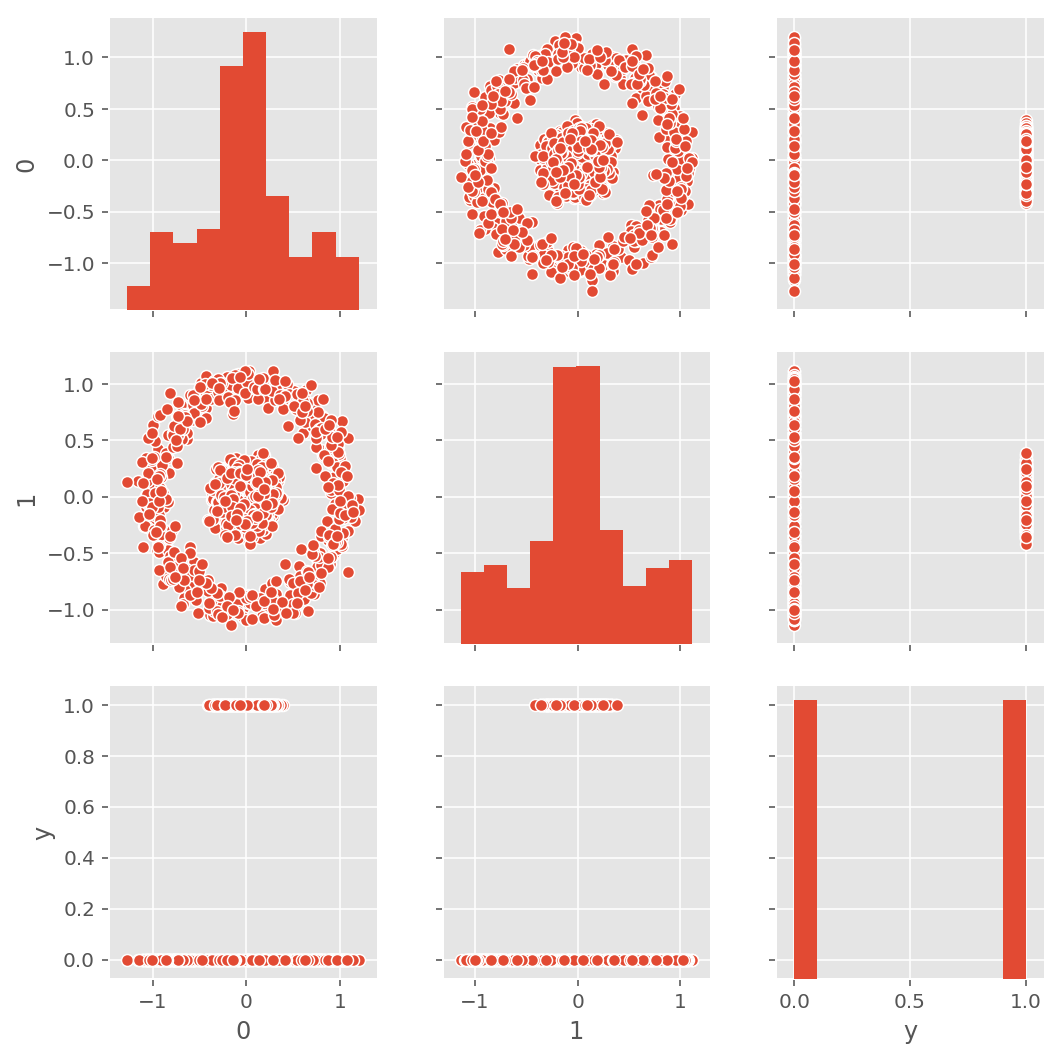

In [32]:
# plot X
sns.pairplot(data = circles)

### 2. Rescale the data

In [33]:
# scale X
ss = StandardScaler()
X = ss.fit_transform(X)

### 3. Fit DBSCAN on the rescaled data

In [35]:
# fit to dbscan model
model = DBSCAN(eps= 0.3 , min_samples=3).fit(X)


### 4. Extract the cluster labels.

In [36]:
# predict clusters
pred = model.labels_
pred


array([ 0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  1,  0,  0,  0,  1,  1,  0,  1,  0,  1,  1,  0,  1,  0,  0,  0,
        1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  0,  1,  0,  0,  1,  0,  1,
        0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,
        1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,
        1,  0,  1,  1,  0,  1,  0,  0,  0,  1,  1,  0,  1,  0,  1,  0,  1,
        1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1,
        0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  1,  1,  1,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  0,  1,
        1,  0,  1,  0,  1

### 5. How many clusters do you get?

In [37]:
# disply the unique values of the clusters
set(pred)

{-1, 0, 1}

### 6. Evaluate DBSCAN

- Visually
- With silhouette score
- Using the true `y`, with homogeneity, completeness and V-measure score

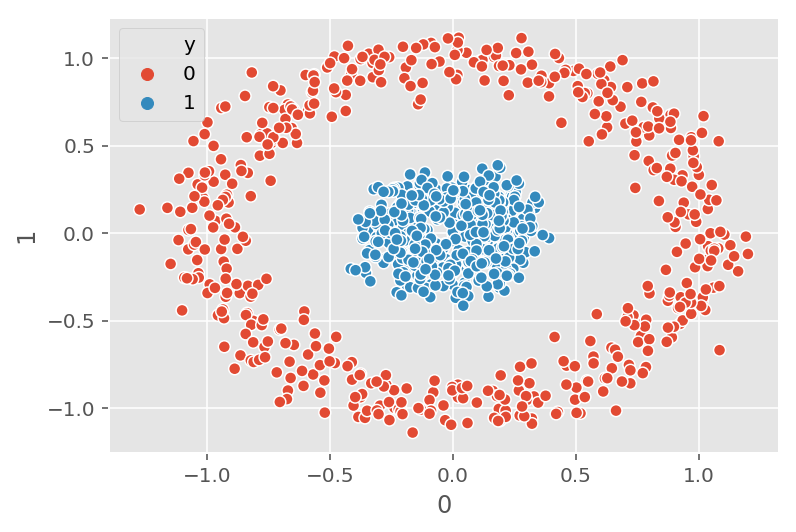

In [39]:
# visuall evaluation
sns.scatterplot(x=0 , y= 1, hue='y', data= circles);

In [40]:
# silhouette score 
silhouette_score(X, pred)

0.19172517145297474

In [41]:
# homogeneity_score
homogeneity_score(y, pred)

0.9999999999999993

In [42]:
# completeness_score
completeness_score(y, pred)

0.9897001551846152

In [43]:
# v_measure_score
v_measure_score(y, pred)

0.9948234185997589

### 7.  Extract the core samples. 

How many do you have?

In [44]:
# Extract the core samples
core = model.core_sample_indices_
core

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [46]:
# number of core indicies
len(core)

998

### 8. Create a scatter plot of the data with coloring according to the cluster labels

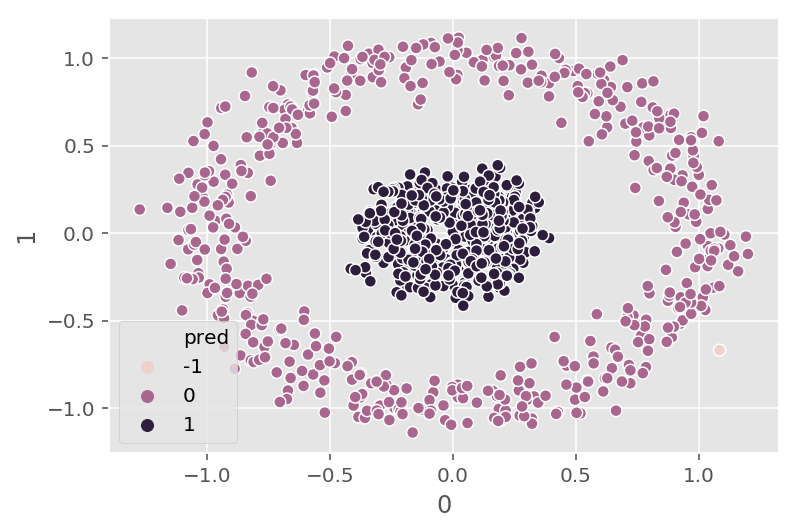

In [27]:
sns.scatterplot(x=0 , y= 1, hue='pred', data= circles)     

In [ ]:
# if the eps increased the predicted clusters will be the same as the true y

## Bonus:

### Try k-means and hierarchical clustering. Which differences do you observe? Which algorithm do you find most suitable in each case? 

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering